In [40]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (8,7)

In [41]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [42]:
import util

io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]
machine = cfg["machine"]
#amount_of_exp = 20
#nb_runs = [4*(i+1) for i in range(amount_of_exp)]
#add_low_nb_runs = True
#if add_low_nb_runs:
#    nb_runs = [i+1 for i in range(20)] + [4*(i+6) for i in range(amount_of_exp)]

# get filenames
stats_path = util.RESULTS_DIR + "/statistics/multiple_pipelines/{}/{}/{}/".format(ad, io.machine.lower(), io.start_year)
filename = "greedy_feature_selection_experiment_practical_recall/greedy_feature_selection_res_19_2021-08-11 23:58:46.645468.csv"

results = io.read_csv(filename, stats_path)
#statistics_dfs = {}
#for nbr in nb_runs:
#    fn = io.get_multiple_pipeline_statistics_filename(nbr, ad)
#    statistics_dfs[nbr] = io.read_csv(fn, stats_path)

"""
for i, stats_csv in enumerate(stats_csvs):
    pipelines = []
    for i in range(stats_csv.shape[0]):
        pipelines.append({'auc': stats_csv['auc'][i],
                          'rank': stats_csv['rank'][i],
                          'auprg': stats_csv['auprg'][i],
                          'practical_recall': stats_csv['practical_recall'][i]})
    plot_data.append(pipelines)
"""
#print(results)

Reading greedy_feature_selection_experiment_practical_recall/greedy_feature_selection_res_19_2021-08-11 23:58:46.645468.csv file


"\nfor i, stats_csv in enumerate(stats_csvs):\n    pipelines = []\n    for i in range(stats_csv.shape[0]):\n        pipelines.append({'auc': stats_csv['auc'][i],\n                          'rank': stats_csv['rank'][i],\n                          'auprg': stats_csv['auprg'][i],\n                          'practical_recall': stats_csv['practical_recall'][i]})\n    plot_data.append(pipelines)\n"

Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/


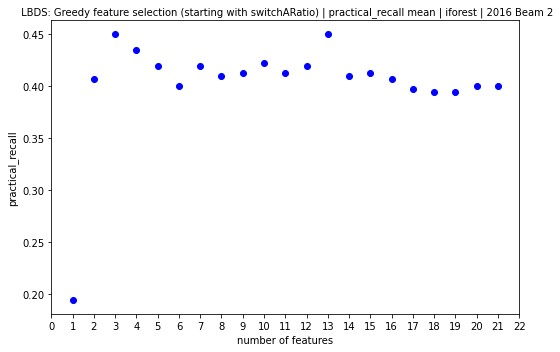

In [43]:
#dfs_to_plot = ['auc', 'rank', 'auprg', 'practical_recall']


#data = {t: {'x': [], 'y': [], 'err_min': [], 'err_max': []} for t in dfs_to_plot}
# means
#for t in dfs_to_plot:
#    for experiment_name, stats_df in statistics_dfs.items():
#        data[t]['x'].append(experiment_name)
#        data[t]['y'].append(stats_df[t].mean())
#        data[t]['err_min'].append(stats_df[t].mean() - stats_df[t].min())
#        data[t]['err_max'].append(stats_df[t].max() - stats_df[t].mean())
# plot statistics
#threshold = cfg["pipeline"]["anomaly_detection"][ad]["threshold"]

#plot
metric_to_plot = 'practical_recall'
save_figures = True
colors = ['b-o']
e_colors = ["#045EDB"]

plt.figure(figsize=(7.5, 5))
plt.scatter(results['nb_features'], results[metric_to_plot], marker='o', linestyle='-', color='b')
plt.title(
    " {}: Greedy feature selection (starting with switchARatio) | {} mean | {} | {} Beam {}".format(machine, metric_to_plot, ad, io.start_year, io.beam),
    fontsize=10)
plt.xlabel("number of features")
plt.xticks(list(np.arange(len(results['nb_features'])+2)))
plt.ylabel(metric_to_plot)
plt.tight_layout()
if save_figures:
    prefix = "{}_{} greedy feature selection".format(machine, metric_to_plot)
    filename = '{}_{}.png'.format(prefix, ad)
    fig_path = io.get_figures_path(ad)
    io.save_figure(plt, fig_path, filename)
plt.show()